<a href="https://colab.research.google.com/github/hariprasanth-22/Hand-Written-Digits-Prediction-Using-RNN-Algorithm-/blob/main/Hand_Writting_Recognition_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

#x_train=x_train.reshape((60000,28,28)).astype('float32')/255
#x_test=x_test.reshape((10000,28,28)).astype('float32')/255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
input_shape=(28,28)
input=Input(shape=input_shape)
rnn_layer=LSTM(128)(input)
outputs=Dense(10,activation='softmax')(rnn_layer)
model=Model(inputs=input,outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7304 - loss: 0.8084 - val_accuracy: 0.9455 - val_loss: 0.1748
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9575 - loss: 0.1397 - val_accuracy: 0.9652 - val_loss: 0.1183
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9731 - loss: 0.0897 - val_accuracy: 0.9776 - val_loss: 0.0745
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.9788 - val_loss: 0.0716
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9833 - loss: 0.0530 - val_accuracy: 0.9792 - val_loss: 0.0620


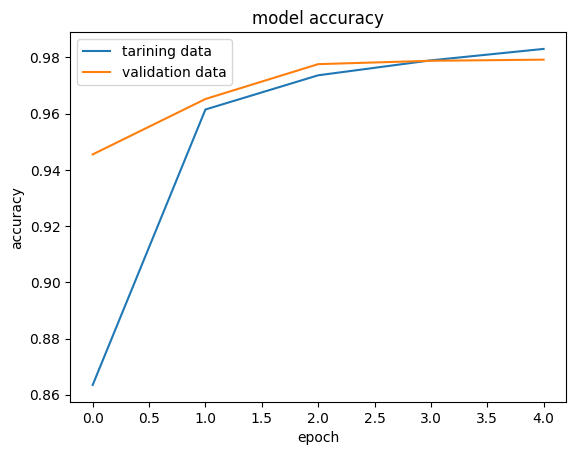

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tarining data','validation data'])

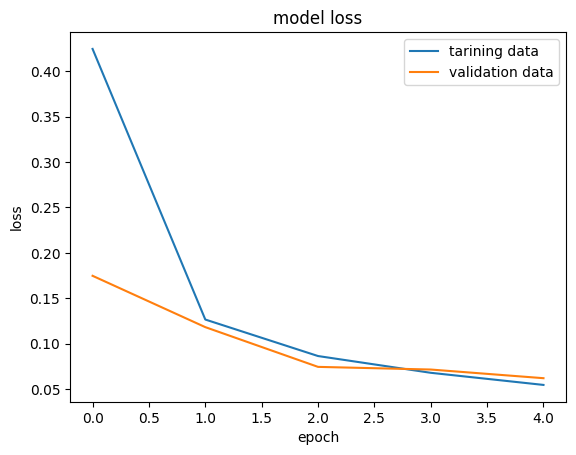

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tarining data','validation data'])

In [ ]:
y_pred=model.predict(x_test)
import numpy as np
y_pred1=np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0.5, 1.0, 'y_test:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.],y_pred:2')

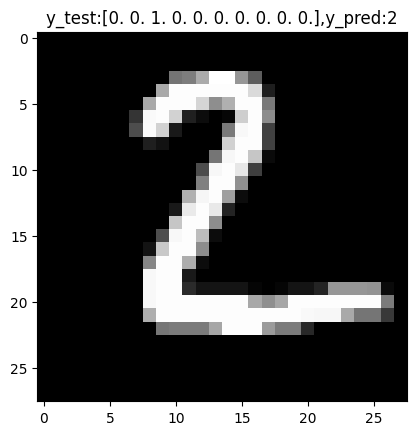

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[1],cmap='gray')
plt.title(f"y_test:{y_test[1]},y_pred:{y_pred1[1]}")